In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [14]:
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
# Split the training data for validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\drake\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 10s - 40ms/step - accuracy: 0.8487 - loss: 0.4726 - val_accuracy: 0.9693 - val_loss: 0.1034
Epoch 2/10
240/240 - 8s - 31ms/step - accuracy: 0.9552 - loss: 0.1521 - val_accuracy: 0.9801 - val_loss: 0.0677
Epoch 3/10
240/240 - 8s - 32ms/step - accuracy: 0.9666 - loss: 0.1089 - val_accuracy: 0.9859 - val_loss: 0.0510
Epoch 4/10
240/240 - 7s - 31ms/step - accuracy: 0.9722 - loss: 0.0910 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 5/10
240/240 - 8s - 31ms/step - accuracy: 0.9764 - loss: 0.0787 - val_accuracy: 0.9883 - val_loss: 0.0401
Epoch 6/10
240/240 - 7s - 31ms/step - accuracy: 0.9789 - loss: 0.0685 - val_accuracy: 0.9896 - val_loss: 0.0369
Epoch 7/10
240/240 - 8s - 33ms/step - accuracy: 0.9805 - loss: 0.0639 - val_accuracy: 0.9898 - val_loss: 0.0352
Epoch 8/10
240/240 - 8s - 32ms/step - accuracy: 0.9825 - loss: 0.0575 - val_accuracy: 0.9909 - val_loss: 0.0328
Epoch 9/10
240/240 - 8s - 32ms/step - accuracy: 0.9825 - loss: 0.0530 - val_accuracy: 0.9909 - val_loss

In [19]:
# Evaluate the model
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {scores[0]} / Test accuracy: {scores[1]}')

Test loss: 0.028287462890148163 / Test accuracy: 0.9898999929428101


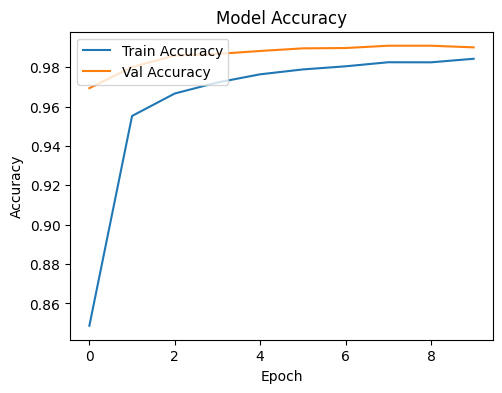

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

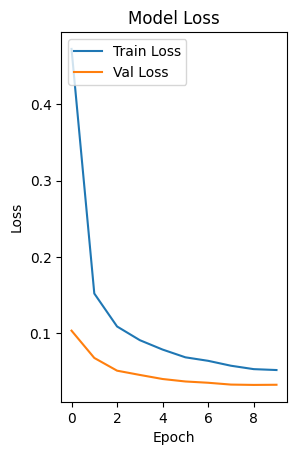

In [21]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [22]:
# Predict the values from the test dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [23]:
# Print classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [24]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

[[ 977    0    0    0    0    0    1    2    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    1 1023    0    0    0    0    7    0    0]
 [   0    0    3  998    0    4    0    3    2    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   2    0    1    6    0  880    1    1    0    1]
 [   6    3    1    0    2    2  942    0    2    0]
 [   0    2    7    0    0    0    0 1017    1    1]
 [   2    2    3    1    1    1    0    3  960    1]
 [   3    2    0    0    3    4    0    7    1  989]]


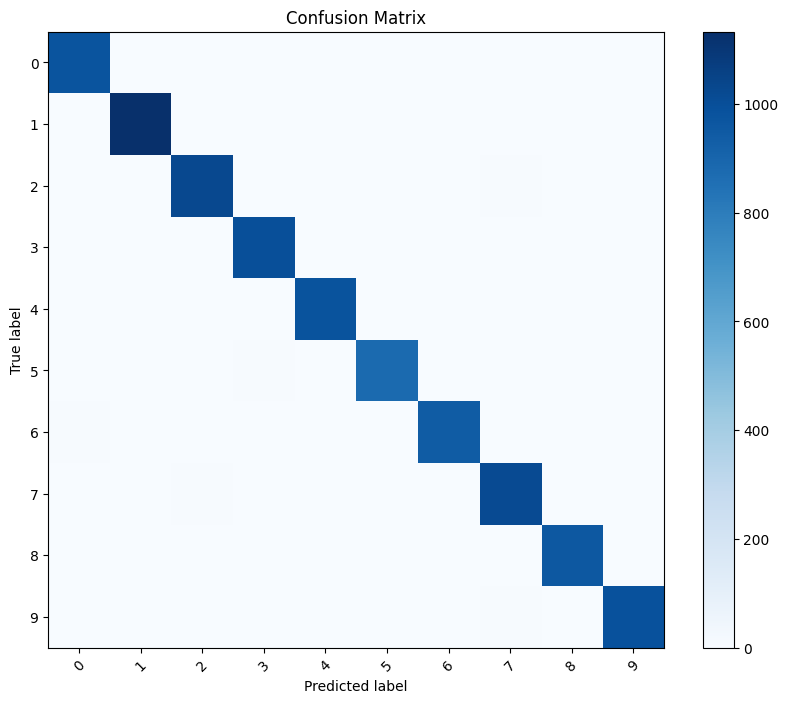

In [25]:
# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks, rotation=45)
plt.yticks(tick_marks, tick_marks)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()